<a href="https://colab.research.google.com/github/Saikat1707/CIFAR10_CNN_prediction_of_10class/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#importing required package
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt


In [73]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [74]:
#normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [75]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

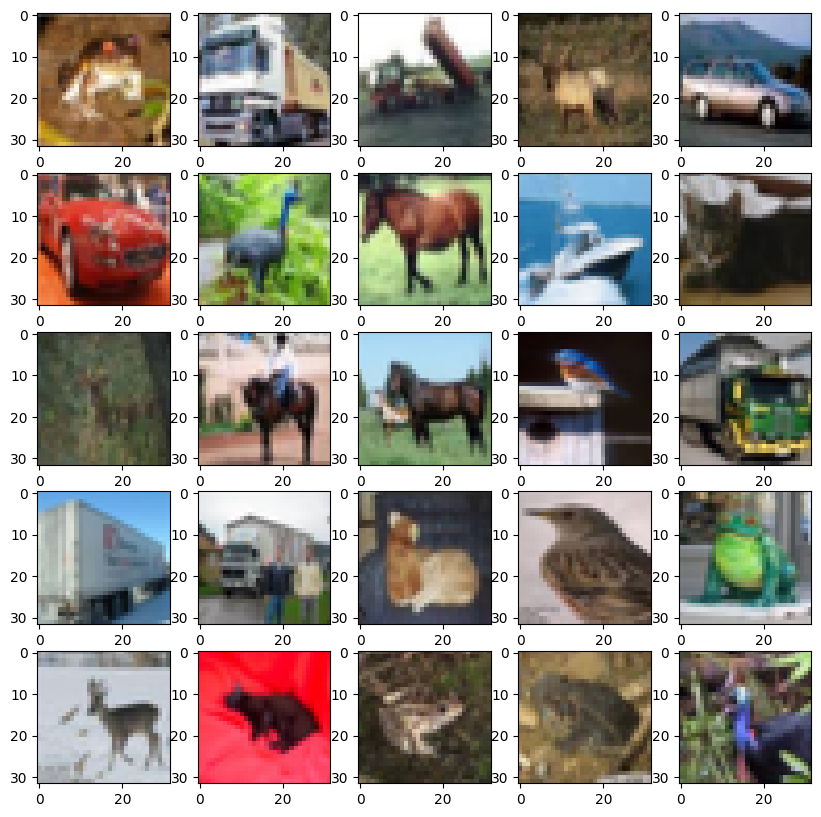

In [76]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])


In [77]:
model = models.Sequential([

    # Block 1
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.35),

    # Block 3
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.45),

    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')  # Output layer
])

In [78]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [79]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,253,834 (12.41 MB)

 Trainable params: 3,251,018 (12.40 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [80]:
history = model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/40
625/625 - 23s - 38ms/step - accuracy: 0.4503 - loss: 1.6702 - val_accuracy: 0.4628 - val_loss: 1.5925
Epoch 2/40
625/625 - 11s - 18ms/step - accuracy: 0.6360 - loss: 1.0304 - val_accuracy: 0.6565 - val_loss: 1.0082
Epoch 3/40
625/625 - 11s - 18ms/step - accuracy: 0.7134 - loss: 0.8152 - val_accuracy: 0.7334 - val_loss: 0.7529
Epoch 4/40
625/625 - 11s - 18ms/step - accuracy: 0.7489 - loss: 0.7157 - val_accuracy: 0.7305 - val_loss: 0.7706
Epoch 5/40
625/625 - 12s - 18ms/step - accuracy: 0.7815 - loss: 0.6336 - val_accuracy: 0.7896 - val_loss: 0.6261
Epoch 6/40
625/625 - 12s - 18ms/step - accuracy: 0.8030 - loss: 0.5640 - val_accuracy: 0.7908 - val_loss: 0.6371
Epoch 7/40
625/625 - 12s - 18ms/step - accuracy: 0.8233 - loss: 0.5066 - val_accuracy: 0.7434 - val_loss: 0.8018
Epoch 8/40
625/625 - 12s - 19ms/step - accuracy: 0.8406 - loss: 0.4605 - val_accuracy: 0.7821 - val_loss: 0.6724
Epoch 9/40
625/625 - 11s - 18ms/step - accuracy: 0.8551 - loss: 0.4159 - val_accuracy: 0.8131 - 

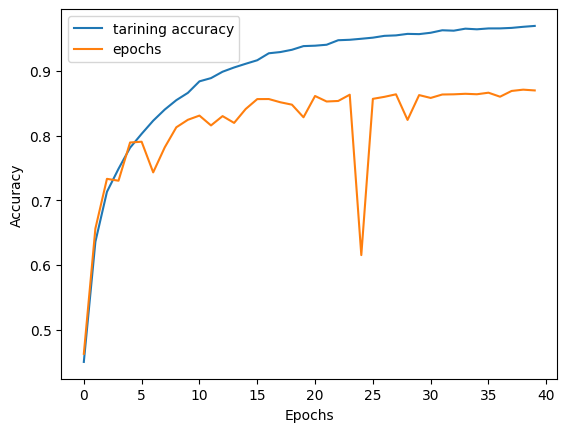

In [81]:
plt.plot(history.history['accuracy'],label='tarining accuracy')
plt.plot(history.history['val_accuracy'],label='epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [82]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.8684 - loss: 0.5524

✅ Test Accuracy: 86.84%
Test Loss: 0.5524


In [83]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3),padding='valid', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='valid',activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # for 10 classes
])


In [87]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [89]:
history2 = model2.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/30
625/625 - 3s - 4ms/step - accuracy: 0.3306 - loss: 1.6855 - val_accuracy: 0.5120 - val_loss: 1.4252
Epoch 2/30
625/625 - 2s - 4ms/step - accuracy: 0.3407 - loss: 1.6532 - val_accuracy: 0.5175 - val_loss: 1.3836
Epoch 3/30
625/625 - 2s - 4ms/step - accuracy: 0.3627 - loss: 1.6123 - val_accuracy: 0.5461 - val_loss: 1.3395
Epoch 4/30
625/625 - 3s - 4ms/step - accuracy: 0.3814 - loss: 1.5796 - val_accuracy: 0.5545 - val_loss: 1.3151
Epoch 5/30
625/625 - 2s - 4ms/step - accuracy: 0.3915 - loss: 1.5522 - val_accuracy: 0.5495 - val_loss: 1.2776
Epoch 6/30
625/625 - 2s - 4ms/step - accuracy: 0.4022 - loss: 1.5244 - val_accuracy: 0.5744 - val_loss: 1.2717
Epoch 7/30
625/625 - 2s - 4ms/step - accuracy: 0.4095 - loss: 1.5124 - val_accuracy: 0.5730 - val_loss: 1.2405
Epoch 8/30
625/625 - 2s - 4ms/step - accuracy: 0.4175 - loss: 1.4919 - val_accuracy: 0.5778 - val_loss: 1.2391
Epoch 9/30
625/625 - 3s - 4ms/step - accuracy: 0.4193 - loss: 1.4795 - val_accuracy: 0.5824 - val_loss: 1.2178
E

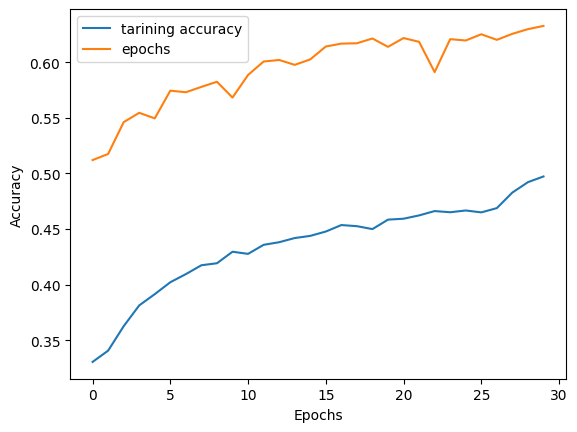

In [90]:
plt.plot(history2.history['accuracy'],label='tarining accuracy')
plt.plot(history2.history['val_accuracy'],label='epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [93]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow  # ✅ Colab-friendly image display

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

def predict_image_cv2(image_path, model):
    # 1️⃣ Read and preprocess the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (32, 32))
    img_resized = img_resized.astype('float32') / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # 2️⃣ Predict
    preds = model.predict(img_resized)
    class_index = np.argmax(preds)
    confidence = np.max(preds) * 100

    # 3️⃣ Display results
    print(f"Predicted Label: {class_names[class_index]}")
    print(f"Confidence: {confidence:.2f}%")

    cv2_imshow(cv2.imread(image_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label: airplane
Confidence: 86.64%


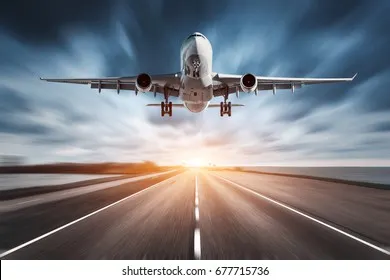

In [94]:
predict_image_cv2("/content/airplane.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Label: airplane
Confidence: 99.96%


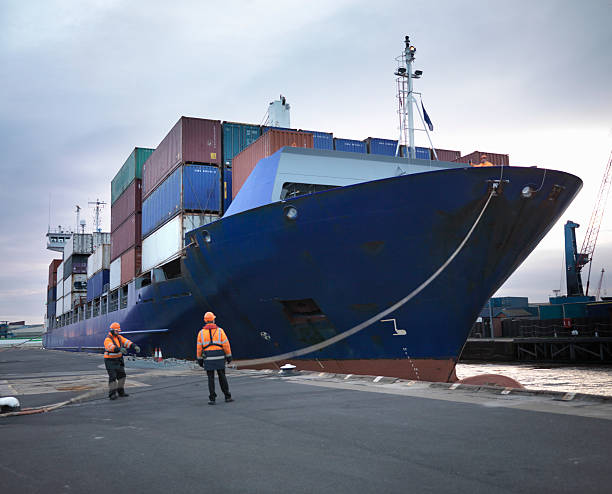

In [95]:
predict_image_cv2("/content/ship.jpg",model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
Predicted Label: airplane
Confidence: 81.06%


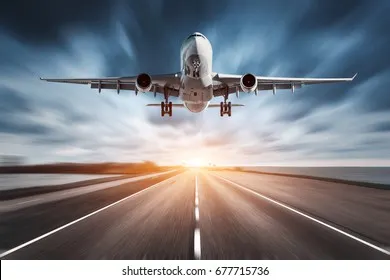

In [96]:
predict_image_cv2("/content/airplane.jpg", model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label: automobile
Confidence: 52.99%


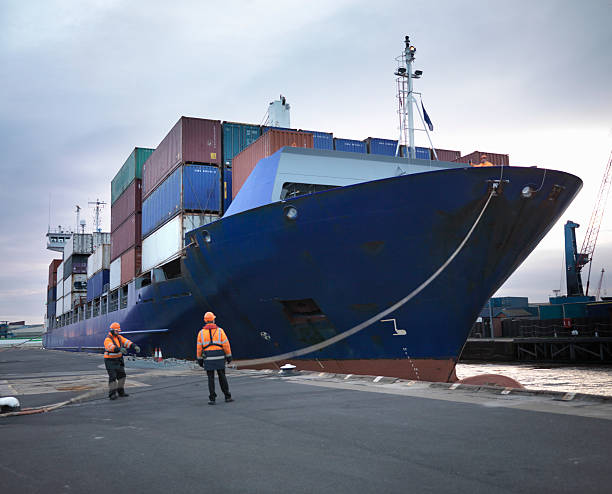

In [97]:
predict_image_cv2("/content/ship.jpg",model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label: cat
Confidence: 99.10%


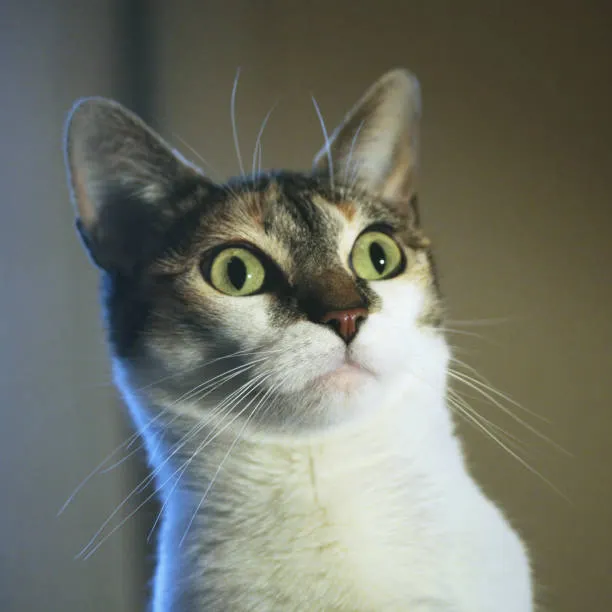

In [104]:
predict_image_cv2("/content/cat.jpg",model)